# Support Vector Machines in Python

Support Vector MAchines are non-probablistic classifiers in the sense they consist of something called hyperplanes to classify data based on training datasets. A hyperplane is essentially an n-dimensional vector, where n the dimension of the vector space of input data.To decide the hyperplane from training dataset, SVM uses the maximum distance of the hyerplane from sample points of the classifications in the training dataset. This is true both for linear as well as non-linear hyperplanes. In order to make the calculations easier for non-linear hyperplanes, SVM uses something called a kernal function. There are various types of kernels - which are essentially transform functions to operate on the vectors of the data. 

Because of this nature of SVMs, they can be used for clustering. Other popular applications of SVM include 1) text and hypertext classification 2) image classification 3) In biological studies for protein classification, etc.

Below are basic examples of SVM using Python. We have used a) linear classifier - as you can see, is a linear hyperplane seperating the data and b) rbf kernel - radial basis function kernel that uses each sample as a centre and 'gamma' as the radius of influence' to classify between similar and non similar samples as well as the C parameter that trades off misclassification of training examples against simplicity of the decision surface [i.e. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors].

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [4]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [5]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=0.0).fit(X, y)

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)


In [6]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max),
 np.arange(y_min, y_max))

In [8]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

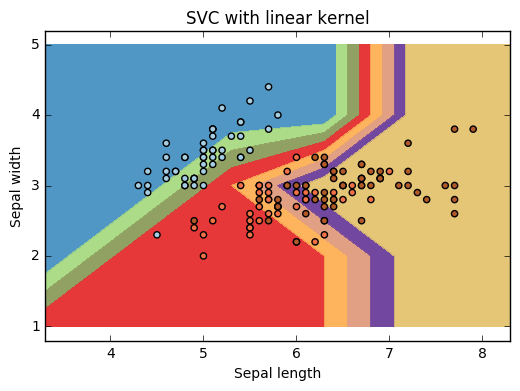

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

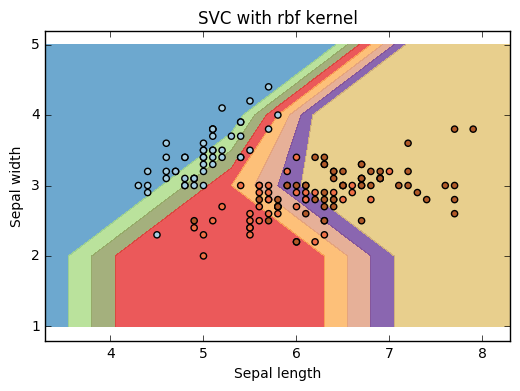

In [14]:
svc = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max),
 np.arange(y_min, y_max))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel')
plt.show()

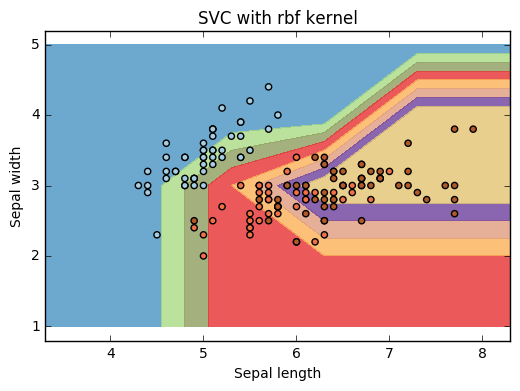

In [16]:
svc = svm.SVC(kernel='rbf', C=100,gamma=0.1).fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max),
 np.arange(y_min, y_max))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel')
plt.show()